In [35]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [36]:
output_files = [[f'result_duckpop_{duckpop}_chickenvacc_{chickenvacc}.h5' for chickenvacc in [0,1500,2250,2700]] for duckpop in [0,1500,3000,5000]]
print(output_files[0][2])

result_duckpop_0_chickenvacc_2250.h5


In [37]:
print('''Saved parameter: num_simu = 1000
Saved parameter: num_flocks = 1
Saved parameter: num_species = 4
Saved parameter: tot_chicken_popul = 3000
Saved parameter: surveillance = 30
Saved parameter: testing_period = 7
Saved parameter: same_species_symptomatic_infection_rate = 1.13
Saved parameter: same_species_asymptomatic_infection_rate = 1.07
Saved parameter: different_species_symptomatic_infection_rate = 0.3
Saved parameter: different_species_asymptomatic_infection_rate = 0.25
Saved parameter: chicken_symptomatic_latency_period = 1
Saved parameter: duck_symptomatic_latency_period = 1
Saved parameter: chicken_asymptomatic_latency_period = 1
Saved parameter: duck_asymptomatic_latency_period = 1
Saved parameter: chicken_symptomatic_infectious_period = 1.4
Saved parameter: duck_symptomatic_infectious_period = 1.4
Saved parameter: chicken_asymptomatic_infectious_period = 15
Saved parameter: duck_asymptomatic_infectious_period = 15
Saved parameter: chicken_symptomatic_prob = 0.95
Saved parameter: duck_symptomatic_prob = 0.05
Saved parameter: farm_area = 5000''')

Saved parameter: num_simu = 1000
Saved parameter: num_flocks = 1
Saved parameter: num_species = 4
Saved parameter: tot_chicken_popul = 3000
Saved parameter: surveillance = 30
Saved parameter: testing_period = 7
Saved parameter: same_species_symptomatic_infection_rate = 1.13
Saved parameter: same_species_asymptomatic_infection_rate = 1.07
Saved parameter: different_species_symptomatic_infection_rate = 0.3
Saved parameter: different_species_asymptomatic_infection_rate = 0.25
Saved parameter: chicken_symptomatic_latency_period = 1
Saved parameter: duck_symptomatic_latency_period = 1
Saved parameter: chicken_asymptomatic_latency_period = 1
Saved parameter: duck_asymptomatic_latency_period = 1
Saved parameter: chicken_symptomatic_infectious_period = 1.4
Saved parameter: duck_symptomatic_infectious_period = 1.4
Saved parameter: chicken_asymptomatic_infectious_period = 15
Saved parameter: duck_asymptomatic_infectious_period = 15
Saved parameter: chicken_symptomatic_prob = 0.95
Saved parameter

In [38]:
def read_output(output_file):
    # Initialize a dictionary to store the results
    simulation_data = {}

    # Open the HDF5 file
    with h5py.File(output_file, 'r') as f:
        # Extract global parameters
        if "parameters" in f:
            global_parameters = {key: f["parameters"][key][:] if key in f["parameters"] 
                                else f["parameters"].attrs[key]
                                for key in f["parameters"]}
            simulation_data["parameters"] = global_parameters

        # Iterate over all other groups (simulations)
        for sim_name in f:
            if sim_name == "parameters":
                continue  # Skip the parameters group
            
            # Access the simulation group
            sim_group = f[sim_name]
            
            # Check for time and state datasets
            if "time" in sim_group and "state" in sim_group:
                t = sim_group["time"][:]
                y = sim_group["state"][:]
                simulation_data[sim_name] = {
                    "time": t,
                    "state": y
                }
            else:
                print(f"Warning: Missing 'time' or 'state' in {sim_name}")

    return simulation_data

In [39]:
def print_parameters(simulation_data):
    if "parameters" in simulation_data:
        print("Global Parameters:")
        
        param_group = simulation_data["parameters"]
        
        # Print the datasets (arrays)
        for key, value in param_group.items():
            print(f"{key}: {value.tolist()}")  # Convert numpy array to list for better readability
        
        # Print the attributes (non-array parameters)
        if isinstance(param_group, h5py.Group):
            for key, value in param_group.attrs.items():
                print(f"{key}: {value}")
        else:
            print("No attributes found in parameters.")
    else:
        print("No parameters found in the simulation data.")

In [40]:
print_parameters(read_output(output_files[1][0]))

Global Parameters:
No attributes found in parameters.


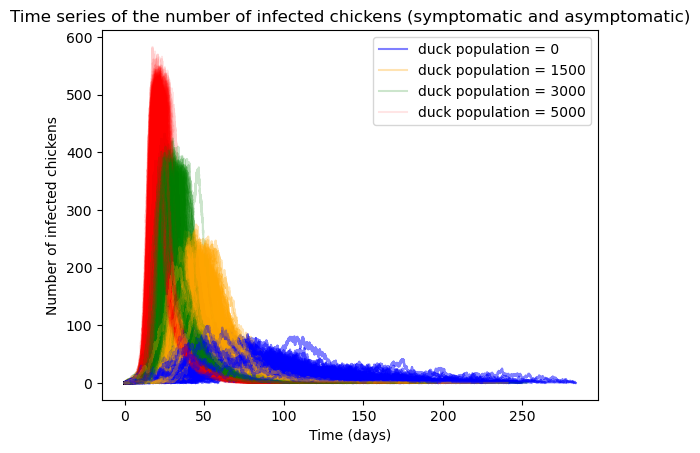

In [41]:
simulation_data1 = read_output(output_files[0][0])
simulation_data2 = read_output(output_files[1][0])
simulation_data3 = read_output(output_files[2][0])
simulation_data4 = read_output(output_files[3][0])
for i in range(1, 1001):
    sim_name = f"simulation_{i}"
    t1 = simulation_data1[sim_name]["time"]
    y1 = simulation_data1[sim_name]["state"]
    t2 = simulation_data2[sim_name]["time"]
    y2 = simulation_data2[sim_name]["state"]
    t3 = simulation_data3[sim_name]["time"]
    y3 = simulation_data3[sim_name]["state"]
    t4 = simulation_data4[sim_name]["time"]
    y4 = simulation_data4[sim_name]["state"]
    if i == 1:
        plt.plot(t1, np.sum(y1[:, 0, 0:2, 3], axis=1) + np.sum(y1[:, 0, 0:2, 4], axis=1), color='blue', alpha=0.5, label='duck population = 0')
        plt.plot(t2, np.sum(y2[:, 0, 0:2, 3], axis=1) + np.sum(y2[:, 0, 0:2, 4], axis=1), color='orange', alpha=0.3, label='duck population = 1500')
        plt.plot(t3, np.sum(y3[:, 0, 0:2, 3], axis=1) + np.sum(y3[:, 0, 0:2, 4], axis=1), color='green', alpha=0.2, label='duck population = 3000')
        plt.plot(t4, np.sum(y4[:, 0, 0:2, 3], axis=1) + np.sum(y4[:, 0, 0:2, 4], axis=1), color='red', alpha=0.1, label='duck population = 5000')
    else:
        plt.plot(t1, np.sum(y1[:, 0, 0:2, 3], axis=1) + np.sum(y1[:, 0, 0:2, 4], axis=1), color='blue', alpha=0.5)
        plt.plot(t2, np.sum(y2[:, 0, 0:2, 3], axis=1) + np.sum(y2[:, 0, 0:2, 4], axis=1), color='orange', alpha=0.3)
        plt.plot(t3, np.sum(y3[:, 0, 0:2, 3], axis=1) + np.sum(y3[:, 0, 0:2, 4], axis=1), color='green', alpha=0.2)
        plt.plot(t4, np.sum(y4[:, 0, 0:2, 3], axis=1) + np.sum(y4[:, 0, 0:2, 4], axis=1), color='red', alpha=0.1)
plt.title('Time series of the number of infected chickens (symptomatic and asymptomatic)')
plt.xlabel('Time (days)')
plt.ylabel('Number of infected chickens')
plt.legend()
plt.show()


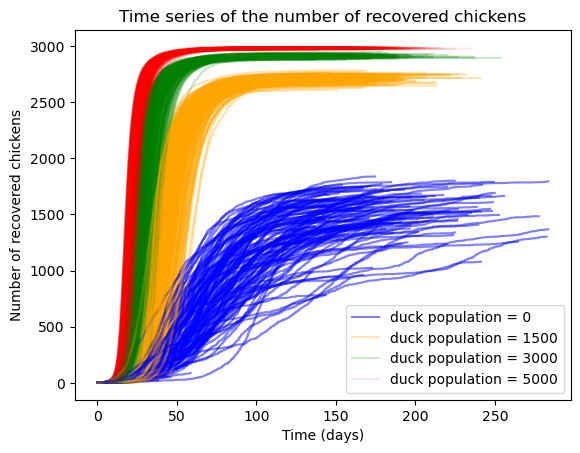

In [42]:
simulation_data1 = read_output(output_files[0][0])
simulation_data2 = read_output(output_files[1][0])
simulation_data3 = read_output(output_files[2][0])
simulation_data4 = read_output(output_files[3][0])
for i in range(1, 1001):
    sim_name = f"simulation_{i}"
    t1 = simulation_data1[sim_name]["time"]
    y1 = simulation_data1[sim_name]["state"]
    t2 = simulation_data2[sim_name]["time"]
    y2 = simulation_data2[sim_name]["state"]
    t3 = simulation_data3[sim_name]["time"]
    y3 = simulation_data3[sim_name]["state"]
    t4 = simulation_data4[sim_name]["time"]
    y4 = simulation_data4[sim_name]["state"]
    if i == 1:
        plt.plot(t1, np.sum(y1[:, 0, 0:2, 5], axis=1), color='blue', alpha=0.5, label='duck population = 0')
        plt.plot(t2, np.sum(y2[:, 0, 0:2, 5], axis=1), color='orange', alpha=0.3, label='duck population = 1500')
        plt.plot(t3, np.sum(y3[:, 0, 0:2, 5], axis=1), color='green', alpha=0.2, label='duck population = 3000')
        plt.plot(t4, np.sum(y4[:, 0, 0:2, 5], axis=1), color='red', alpha=0.1, label='duck population = 5000')
    else:
        plt.plot(t1, np.sum(y1[:, 0, 0:2, 5], axis=1), color='blue', alpha=0.5)
        plt.plot(t2, np.sum(y2[:, 0, 0:2, 5], axis=1), color='orange', alpha=0.3)
        plt.plot(t3, np.sum(y3[:, 0, 0:2, 5], axis=1), color='green', alpha=0.2)
        plt.plot(t4, np.sum(y4[:, 0, 0:2, 5], axis=1), color='red', alpha=0.1)
plt.title('Time series of the number of recovered chickens')
plt.xlabel('Time (days)')
plt.ylabel('Number of recovered chickens')
plt.legend()
plt.show()


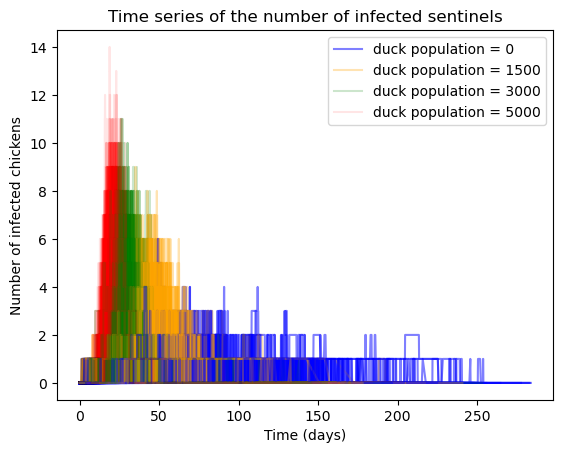

In [43]:
simulation_data1 = read_output(output_files[0][0])
simulation_data2 = read_output(output_files[1][0])
simulation_data3 = read_output(output_files[2][0])
simulation_data4 = read_output(output_files[3][0])
for i in range(1, 1001):
    sim_name = f"simulation_{i}"
    t1 = simulation_data1[sim_name]["time"]
    y1 = simulation_data1[sim_name]["state"]
    t2 = simulation_data2[sim_name]["time"]
    y2 = simulation_data2[sim_name]["state"]
    t3 = simulation_data3[sim_name]["time"]
    y3 = simulation_data3[sim_name]["state"]
    t4 = simulation_data4[sim_name]["time"]
    y4 = simulation_data4[sim_name]["state"]
    if i == 1:
        plt.plot(t1, y1[:, 0, 1, 3] + y1[:, 0, 1, 4], color='blue', alpha=0.5, label='duck population = 0')
        plt.plot(t2, y2[:, 0, 1, 3] + y2[:, 0, 1, 4], color='orange', alpha=0.3, label='duck population = 1500')
        plt.plot(t3, y3[:, 0, 1, 3] + y3[:, 0, 1, 4], color='green', alpha=0.2, label='duck population = 3000')
        plt.plot(t4, y4[:, 0, 1, 3] + y4[:, 0, 1, 4], color='red', alpha=0.1, label='duck population = 5000')
    else:
        plt.plot(t1, y1[:, 0, 1, 3] + y1[:, 0, 1, 4], color='blue', alpha=0.5)
        plt.plot(t2, y2[:, 0, 1, 3] + y2[:, 0, 1, 4], color='orange', alpha=0.3)
        plt.plot(t3, y3[:, 0, 1, 3] + y3[:, 0, 1, 4], color='green', alpha=0.2)
        plt.plot(t4, y4[:, 0, 1, 3] + y4[:, 0, 1, 4], color='red', alpha=0.1)
plt.title('Time series of the number of infected sentinels')
plt.xlabel('Time (days)')
plt.ylabel('Number of infected chickens')
plt.legend()
plt.show()
